# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Darya 🖊  
* **Last Name** : Ansaripour 📝  
* **SID** : 610300022 🆔

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("hotels_in_europe.csv")

In [3]:
# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB
None


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

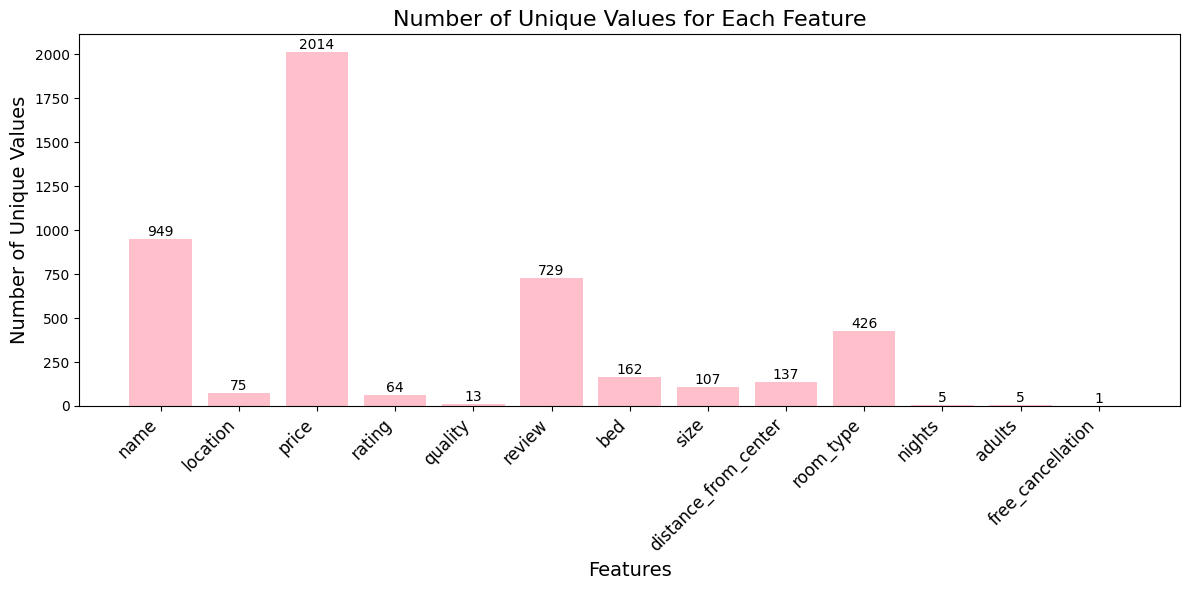

In [4]:
# Plot the unique values for each feature

# Calculate the number of unique values for each column
unique_values = {column: df[column].nunique() for column in df.columns}
plt.figure(figsize=(12, 6))
bars = plt.bar(unique_values.keys(), unique_values.values(), color='pink')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10)

plt.title("Number of Unique Values for Each Feature", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Number of Unique Values", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

### 🧩 Manipulate Columns 🔢  
Numericals

In [5]:
# Extract numerical values
df['price'] = (df['price'].str.extract(r'([\d,]+)')[0].str.replace(",", "", regex=False).astype(float))
df['review'] = (df['review'].str.extract(r'([\d,]+)')[0].str.replace(",", "", regex=False).astype(float))
df['size'] = (df['size'].str.extract(r'([\d,]+)')[0].str.replace(",", "", regex=False).astype(float))
df['nights'] = (df['nights'].str.extract(r'([\d,]+)')[0].str.replace(",", "", regex=False).astype(float))
df['adults'] = (df['adults'].str.extract(r'([\d,]+)')[0].str.replace(",", "", regex=False).astype(float))
df['bed'] = (df['bed'].str.extract(r'([\d,]+)')[0].str.replace(",", "", regex=False).astype(float))


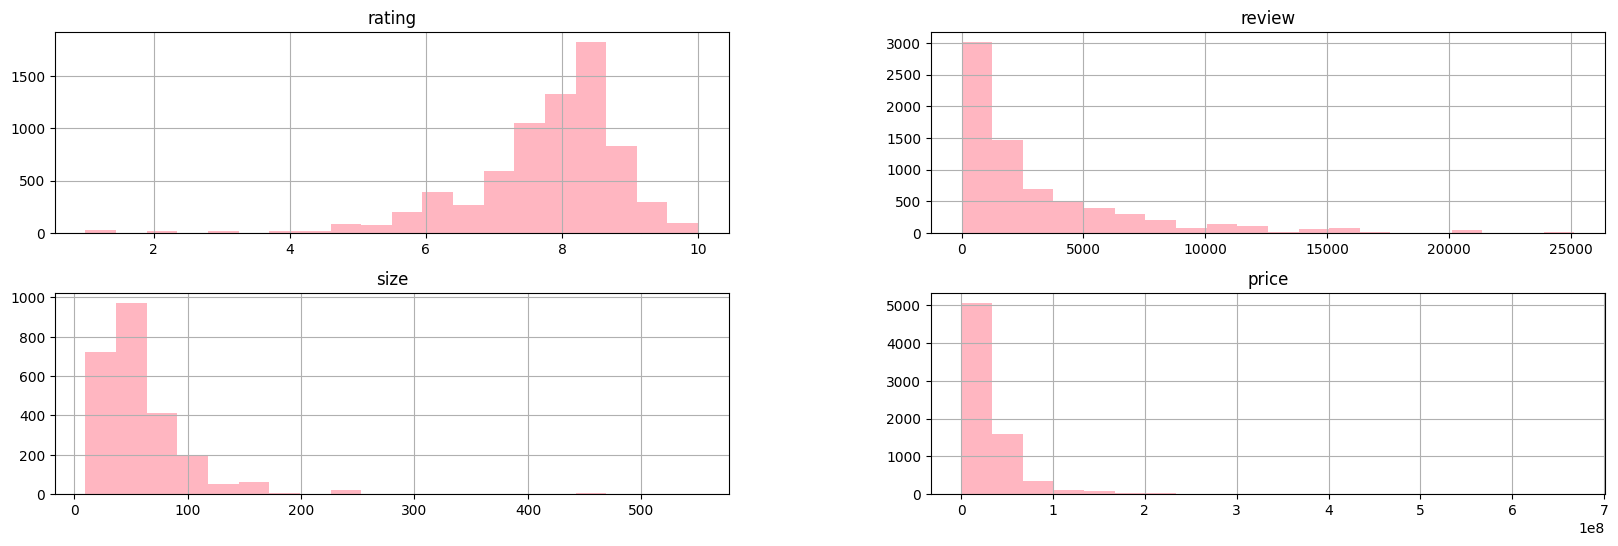

In [6]:
# Some plots to detect variables' distributions
numerical_columns = ['rating', 'review', 'size', 'price']
df[numerical_columns].hist(bins=20, figsize=(20, 6), color='lightpink')
plt.show()

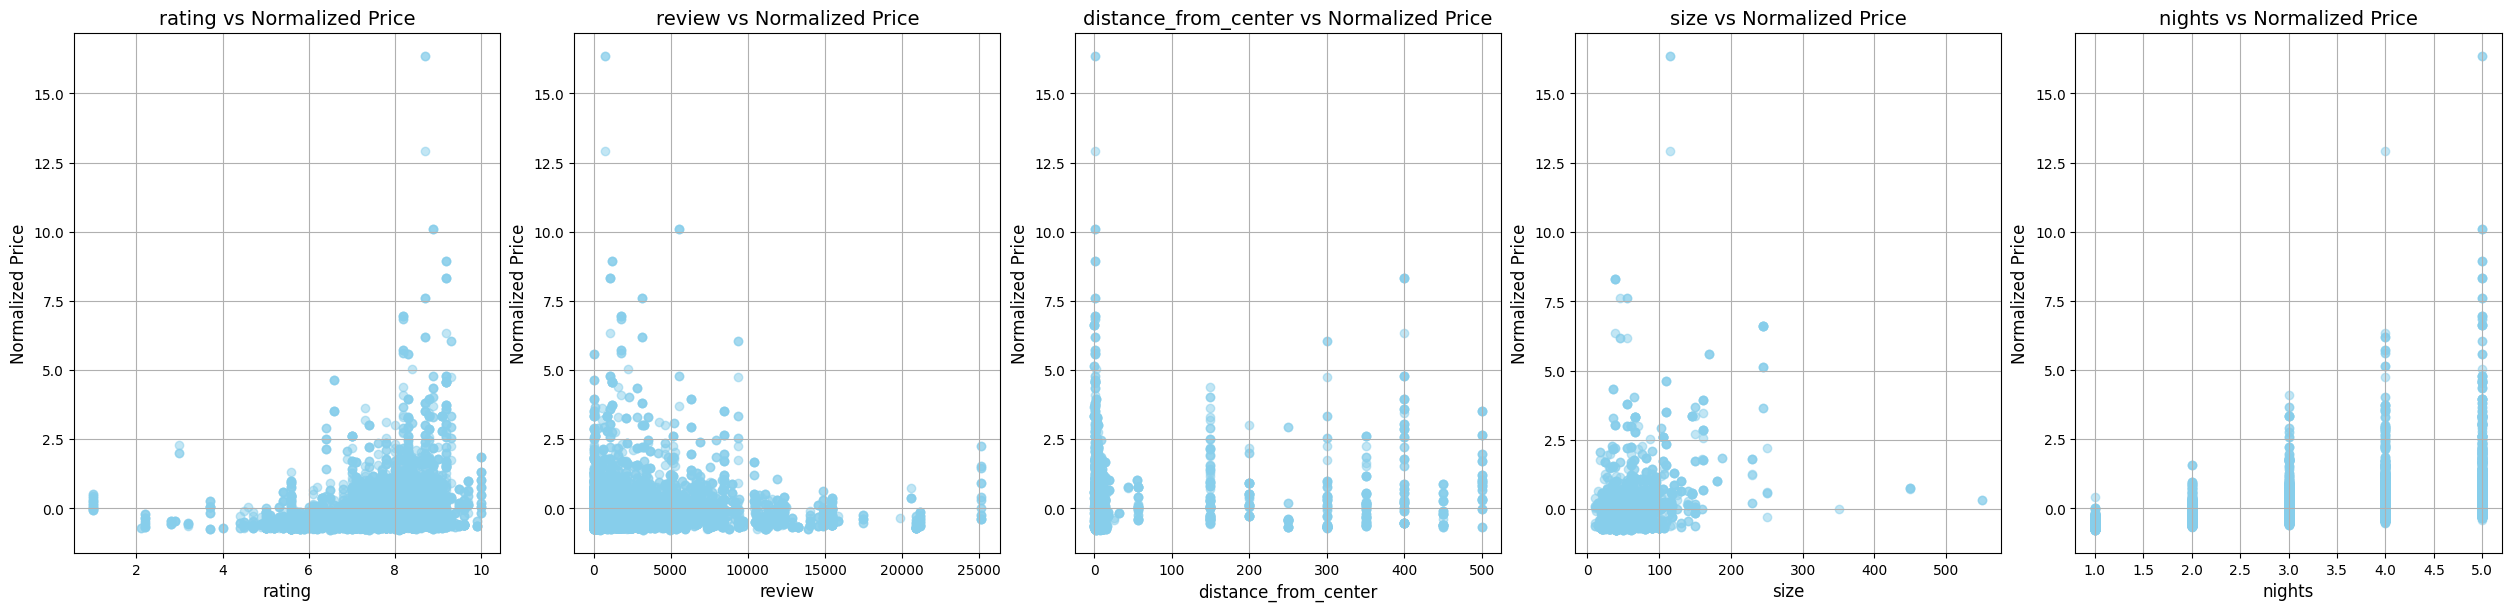

In [7]:
# Plot the correlations (numerical features)
scaler = StandardScaler()
target_normalized = scaler.fit_transform(df[['price']])

features = ['rating', 'review', 'distance_from_center', 'size', 'nights']

fig, axes = plt.subplots(1, 5, figsize=(25, 6), constrained_layout=True)  # 1 row, 3 columns

for ax, feature in zip(axes, features):
    ax.scatter(df[feature],  target_normalized, alpha=0.5, color='skyblue')
    ax.set_title(f'{feature} vs Normalized Price', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Normalized Price', fontsize=12)
    ax.grid(True)

plt.show()

### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  

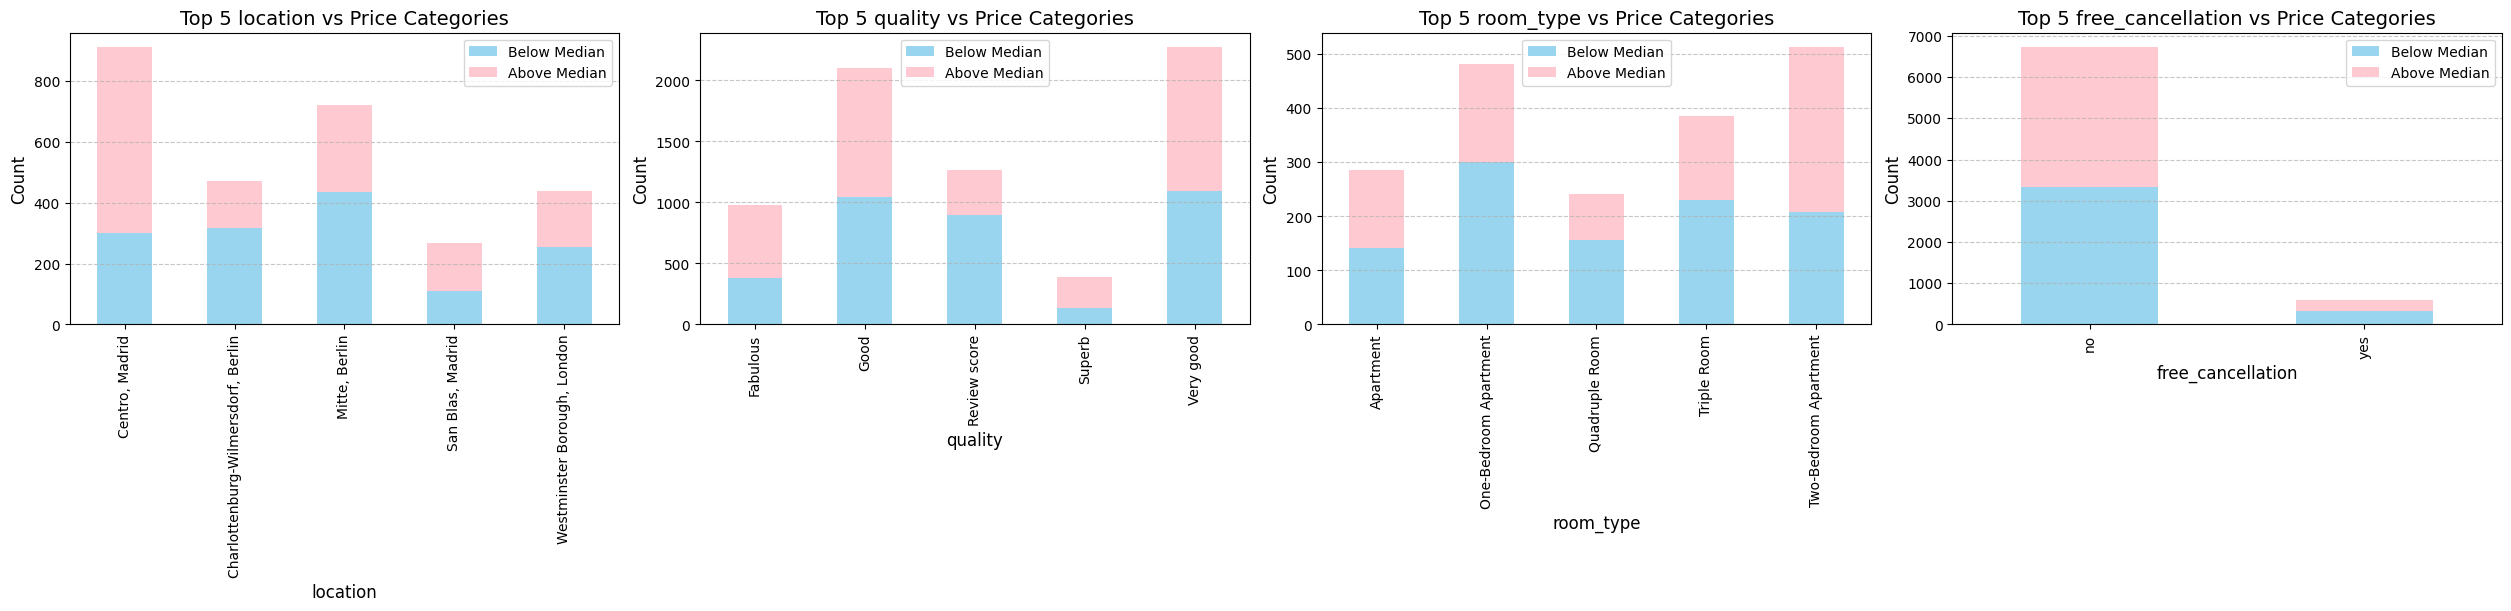

In [8]:
# Plot the correlations (categorical features)

# First let classify the price variable
price_median = df['price'].median()
df['price_categorical'] = (df['price'] > price_median).astype(int)
df['free_cancellation'] = df['free_cancellation'].apply(lambda x: "yes" if x == "Free cancellation" else "no")

features = ['location', 'quality', 'room_type', 'free_cancellation']

fig, axes = plt.subplots(1, 4, figsize=(25, 6), constrained_layout=True)

for ax, feature in zip(axes, features):
    top_categories = df[feature].value_counts().nlargest(5).index
    filtered_df = df[df[feature].isin(top_categories)]

    grouped = filtered_df.groupby([feature, 'price_categorical']).size().unstack(fill_value=0)
    grouped.plot(kind='bar', stacked=True, color=['skyblue', 'pink'], ax=ax, alpha=0.85)

    ax.set_title(f'Top 5 {feature} vs Price Categories', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(['Below Median', 'Above Median'], fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<Figure size 800x200 with 0 Axes>

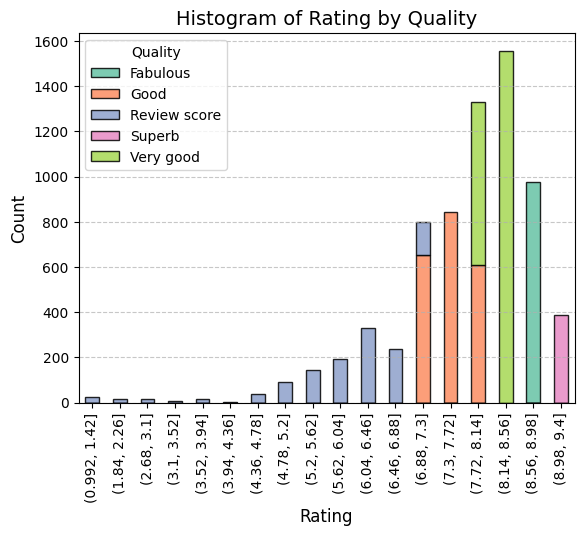

In [9]:
# One have to make sure about correlated features and remove one if needed, for example consider rating and quality

top_qualities = df['quality'].value_counts().nlargest(5).index
filtered_df = df[df['quality'].isin(top_qualities)]
palette = sns.color_palette("Set2", n_colors=len(top_qualities))

plt.figure(figsize=(8, 2))

quality_counts = pd.crosstab(pd.cut(filtered_df['rating'], bins=20), filtered_df['quality'])
quality_counts.plot(kind='bar', stacked=True, color=palette, edgecolor='black', alpha=0.85)

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Rating by Quality', fontsize=14)
plt.legend(title='Quality', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

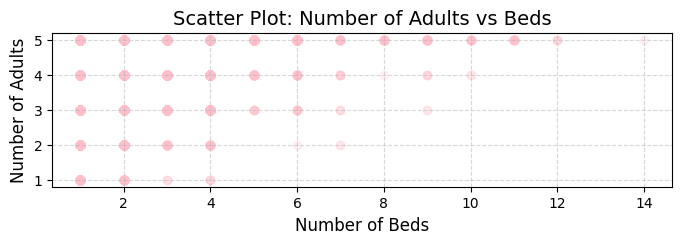

In [10]:
# Scatter plot of number of adults vs. beds
plt.figure(figsize=(8, 2))
plt.scatter(df['bed'], df['adults'], alpha=0.2, color='pink')
plt.title('Scatter Plot: Number of Adults vs Beds', fontsize=14)
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Number of Adults', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### ➖ Remove Columns 

In [11]:
# Correlations
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
corr_matrix

,price,rating,review,bed,size,distance_from_center,nights,adults
price,1.000000,0.210171,-0.023153,0.172231,0.337291,0.187290,0.576378,0.247144
rating,0.210171,1.000000,0.126132,-0.143032,0.108381,0.108656,0.005026,-0.168568
review,-0.023153,0.126132,1.000000,-0.295576,-0.187881,0.023601,-0.019167,-0.349726
bed,0.172231,-0.143032,-0.295576,1.000000,0.626507,0.001397,0.123189,0.654204
size,0.337291,0.108381,-0.187881,0.626507,1.000000,0.085221,0.112450,0.384324
distance_from_center,0.187290,0.108656,0.023601,0.001397,0.085221,1.000000,0.032558,0.009839
nights,0.576378,0.005026,-0.019167,0.123189,0.112450,0.032558,1.000000,0.220596
adults,0.247144,-0.168568,-0.349726,0.654204,0.384324,0.009839,0.220596,1.000000


In [12]:
# Results of previous cells shows that we really don't need quality, since it's highly correlated with rating.
df = df.drop(columns=['quality'])
# Name of a hotel is not a good predictor too!
df = df.drop(columns=['name', 'room_type'])
# Since we added categorical price
df = df.drop(columns=['price'])
# The size of the room is also highly correlated with number of beds, we will remove size because of the high rate of missing.
df = df.drop(columns=['size'])

### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [13]:
# I add city column in order to reduce the number of possible values for location
df['city'] = df['location'].str.split(',').str[1].str.strip()
num_unique_cities = df['city'].nunique()
print(f"Number of unique cities: {num_unique_cities}")
df = df.drop(columns=['location'])

Number of unique cities: 4


### 🧩 Manipulate Columns 🔢  
Categoricals

In [14]:
# Fix free cancelation column!
df['free_cancellation'] = df['free_cancellation'].apply(lambda x: 1 if x == "yes" else 0)
# Add indicators to prevent an unwanted order between cities!
city_dummies = pd.get_dummies(df['city'], prefix='city')
df = pd.concat([df, city_dummies], axis=1)
df = df.drop(columns=['city'])

### 🛠 Handling Missing Values 💡
There are null values in rating, quality, review, bed, size and free cancellation.

For rating, review and size we can impute mean value.\
For bed I impute mode value.\
I removed the quality column because of its correlation so we need not to be worry about that.\
NaN in free cancellations means there's no free cancellation, so I just imputed 0 for them.\

Note that imputing mean or mode may reduce variance of data, so one can impute randomly.


In [15]:
# Different data imputation methods
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['review'] = df['review'].fillna(int(df['review'].mean()))
df['bed'] = df['bed'].fillna(df['bed'].mode()[0])

print(df.isnull().sum())

rating                  0
review                  0
bed                     0
distance_from_center    0
nights                  0
adults                  0
free_cancellation       0
price_categorical       0
city_Berlin             0
city_London             0
city_Madrid             0
city_Paris              0
dtype: int64


## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [16]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

X = df.drop(columns=['price_categorical'])
y = df['price_categorical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} rows')
print(f'Test set size: {X_test.shape[0]} rows')

Training set size: 5857 rows
Test set size: 1465 rows


### 🌐 Normalization  
### Normalization vs Standardization

When preparing data for machine learning models, it's important to transform features into a format suitable for the model. The methods of normalization and standardization help achieve this, particularly when dealing with features that have different scales.

#### 1. Normalization
Normalization, or Min-Max Scaling, is the process of scaling the data to a fixed range, usually $[0, 1]$. This method is especially useful when the data does not follow a normal distribution.

**Formula**:
$$
X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

#### 2. Standardization
Standardization, or Z-score normalization, is a method where the data is transformed to have a mean of 0 and a standard deviation of 1. This method is preferred when the data follows a Gaussian (normal) distribution.

**Formula**:
$$
X_{\text{Z}} = \frac{X - \mu}{\sigma}
$$

#### Importance of Normalization/Standardization
- For Machine Learning Models: Many algorithms work better when features are on the same scale. Without normalization, features with large numerical values can dominate over features with smaller values.

### Choice of Method Based on EDA
After performing Exploratory Data Analysis (EDA), the choice of normalization or standardization depends on:

1. Range of Data:
   - If the features have a bounded range (e.g., ratings between 0 to 10), normalization would be preferred since it brings all features to a common range and helps algorithms that rely on distance metrics. (For example rating.)
   
2. Presence of Outliers:
   - If the dataset contains many outliers, standardization is often better because it uses the mean and standard deviation, which are less sensitive to outliers compared to Min-Max Scaling. (For example price.)

I choose min max scaler because of the ranges through dataset

In [17]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

### 1. Confusion Matrix
A confusion matrix summarizes the performance of a classification model by showing the counts of actual vs. predicted labels. For binary classification, it looks like this:

|                | **Predicted Positive (1)** | **Predicted Negative (0)** |
|----------------|-----------------------------|-----------------------------|
| **Actual Positive (1)** | True Positives (TP)           | False Negatives (FN)          |
| **Actual Negative (0)** | False Positives (FP)          | True Negatives (TN)           |

- **True Positives (TP)**: Correctly predicted positive cases.
- **True Negatives (TN)**: Correctly predicted negative cases.
- **False Positives (FP)**: Incorrectly predicted positive cases (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative cases (Type II error).

### 2. Key Metrics
These metrics are derived from the confusion matrix:

#### a. Accuracy
- Measures the proportion of correct predictions.
- **Formula**:
  $
  \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
  $
- **Use Case**: Useful when the dataset is balanced (i.e., classes are of similar size).

---

#### b. Precision
- The proportion of correctly predicted positive cases out of all predicted positives.
- **Formula**:
  $
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  $
- **Use Case**: Important when false positives are costly (e.g., in spam email detection).

---

#### c. Recall (Sensitivity or True Positive Rate)
- The proportion of actual positives that are correctly predicted.
- **Formula**:
  $
  \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $
- **Use Case**: Important when false negatives are costly (e.g., in disease diagnosis).

---

#### d. F1-Score
- The harmonic mean of precision and recall, balancing both metrics.
- **Formula**:
  $
  \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $
- **Use Case**: Useful when precision and recall need to be optimized simultaneously (e.g., in imbalanced datasets).


### 3. Averaging Methods
In multiclass classification, metrics like precision, recall, and F1-score can be calculated using different averaging techniques:

#### a. Macro Averaging
- Calculates the metric independently for each class and then averages them.
- Treats all classes equally, regardless of their size.
- **Formula for Precision**:
  $
  \text{Macro Precision} = \frac{\text{Precision}_1 + \text{Precision}_2 + ... + \text{Precision}_n}{n}
  $
- **Use Case**: Focuses on class-wise performance, suitable when all classes are equally important.

---

#### b. Micro Averaging
- Aggregates the contributions of all classes to compute the metric.
- Treats each instance equally, regardless of its class.
- **Formula for Precision**:
  $
  \text{Micro Precision} = \frac{\text{Sum of TP for all classes}}{\text{Sum of TP + FP for all classes}}
  $
- **Use Case**: Suitable for datasets with imbalanced class distributions.

---

#### c. Weighted Averaging
- Like macro averaging but assigns a weight to each class proportional to its support (number of true instances).
- **Formula for Precision**:
  $
  \text{Weighted Precision} = \frac{\text{Weight}_1 \cdot \text{Precision}_1 + \text{Weight}_2 \cdot \text{Precision}_2 + ...}{\text{Total Support}}
  $
- **Use Case**: Balances the influence of each class, suitable for imbalanced datasets.

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#### 📉 Gaussian Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       741
           1       0.89      0.85      0.87       724

    accuracy                           0.87      1465
   macro avg       0.87      0.87      0.87      1465
weighted avg       0.87      0.87      0.87      1465

Accuracy: 0.87


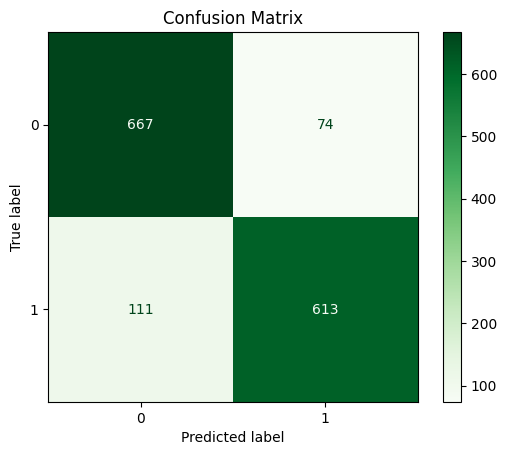

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

#### 🌳 Decision Tree Classifier

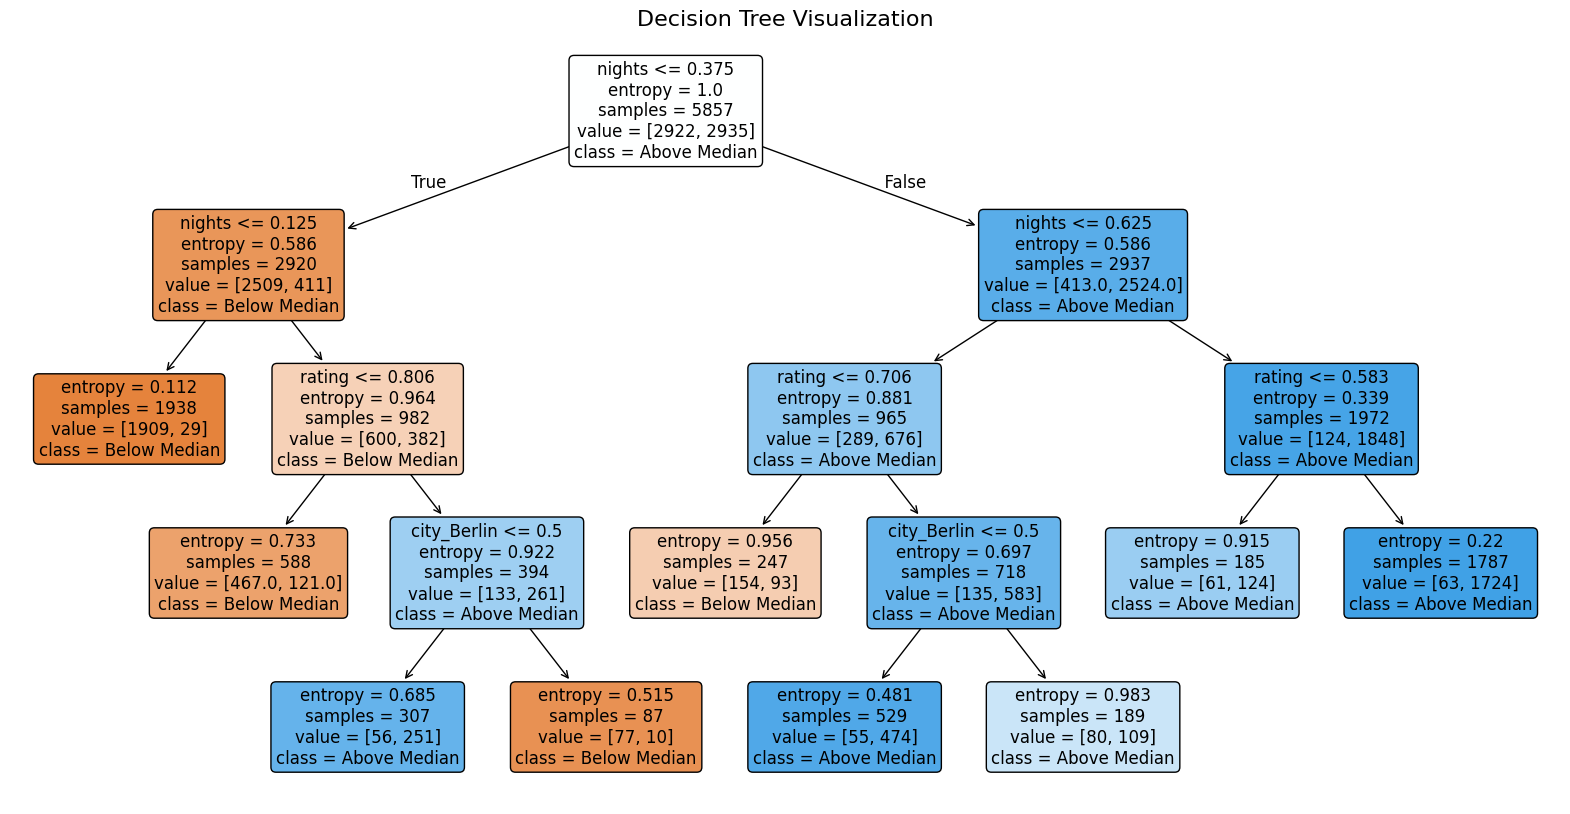

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       741
           1       0.89      0.92      0.91       724

    accuracy                           0.91      1465
   macro avg       0.91      0.91      0.91      1465
weighted avg       0.91      0.91      0.91      1465

Accuracy: 0.91


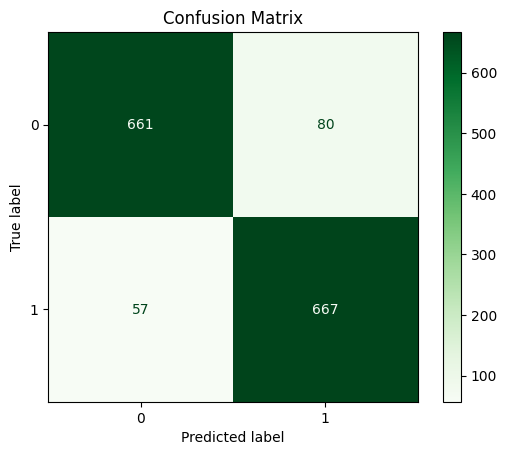

In [20]:
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', ccp_alpha=0.01)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Below Median', 'Above Median'], filled=True, rounded=True,fontsize=12)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

y_pred = dt.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

#### 🌲🌳 Random Forest Classifier 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 30}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       741
           1       0.95      0.97      0.96       724

    accuracy                           0.96      1465
   macro avg       0.96      0.96      0.96      1465
weighted avg       0.96      0.96      0.96      1465

Accuracy: 0.96


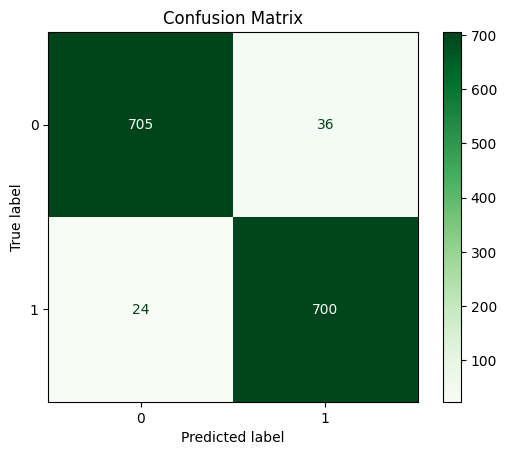

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],           # Number of trees
    'max_depth': [None, 10, 20, 30, 50],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],               # Minimum samples to split a node
    'min_samples_leaf': [10, 20, 40],                 # Minimum samples per leaf
    # 'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider for splits
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()


#### ⚡️ Adaptive Boosting

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       741
           1       0.91      0.93      0.92       724

    accuracy                           0.92      1465
   macro avg       0.92      0.92      0.92      1465
weighted avg       0.92      0.92      0.92      1465

n_estimators=50, Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       741
           1       0.91      0.93      0.92       724

    accuracy                           0.92      1465
   macro avg       0.92      0.92      0.92      1465
weighted avg       0.92      0.92      0.92      1465

n_estimators=100, Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       741
           1       0.92      0.94      0.93       724

    accuracy                           0.93     

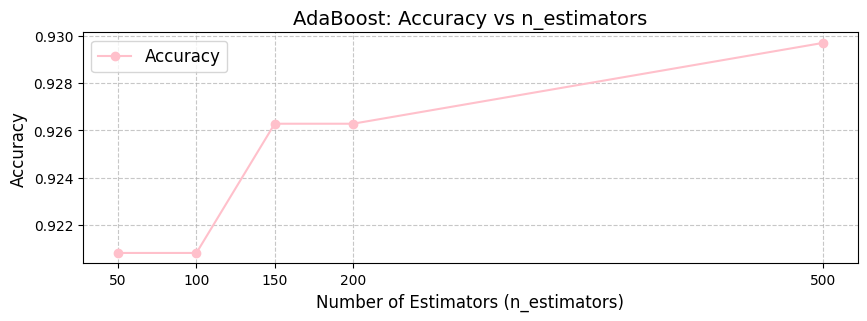

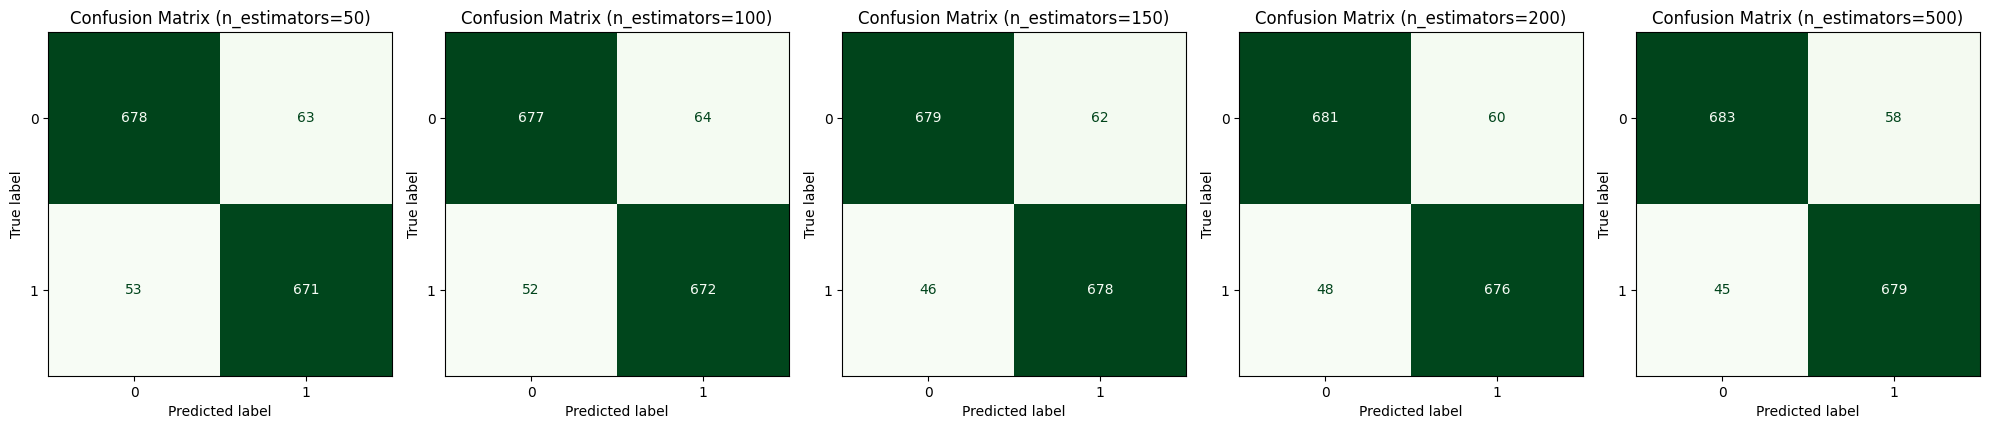

In [22]:
n_estimators_values = [50, 100, 150, 200, 500]
accuracies = []
confusion_matrices = []

for n in n_estimators_values:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    
    y_pred = ada.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"n_estimators={n}, Accuracy: {accuracy:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

plt.figure(figsize=(10, 3))
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='pink', label="Accuracy")
plt.title('AdaBoost: Accuracy vs n_estimators', fontsize=14)
plt.xlabel('Number of Estimators (n_estimators)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(n_estimators_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

fig, axes = plt.subplots(1, len(n_estimators_values), figsize=(20, 6))
for i, (n, cm) in enumerate(zip(n_estimators_values, confusion_matrices)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
    disp.plot(ax=axes[i], cmap='Greens', colorbar=False)
    axes[i].set_title(f"Confusion Matrix (n_estimators={n})", fontsize=12)
plt.tight_layout()
plt.show()

#### ⚡️ XGBoost

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       741
           1       0.99      0.99      0.99       724

    accuracy                           0.99      1465
   macro avg       0.99      0.99      0.99      1465
weighted avg       0.99      0.99      0.99      1465

Accuracy: 0.99


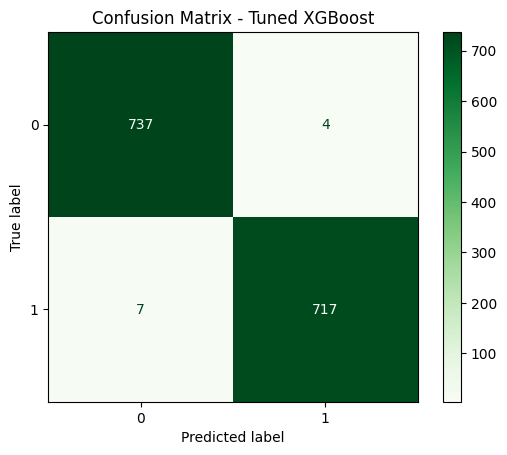

In [23]:
param_grid = {
    'learning_rate': [0.01,0.1],  # Step size at each iteration
    'n_estimators': [50,100],           # Number of trees
    'max_depth': [None,10 ,20],           # Maximum depth of trees
    'min_samples_split': [2,20],               # Minimum samples to split a node
    'min_samples_leaf': [10,40],                 # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],      # Number of features to consider for splits  
}


xgb_model = GradientBoostingClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring = 'accuracy', cv = 5, verbose = 2, n_jobs = -1)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()


### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch. Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np

class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples, n_classes = X.shape[0], len(np.unique(y))
        self.weights = np.ones(n_samples, dtype=float) / n_samples  # Initialize weights uniformly

        for _ in range(self.n_estimators):
            # Clone the base estimator and fit it to the weighted dataset
            learner = clone(self.base_estimator)
            learner.fit(X, y, sample_weight=self.weights)

            # Predict the training set
            pred = learner.predict(X)

            # Compute misclassification indicator
            miss_classified = pred != y

            # Compute learner error rate (SAMME algorithm)
            error_rate = np.sum(self.weights * miss_classified) / np.sum(self.weights)

            # If error is worse than random, don't add it!
            if error_rate >= 1 - (1 / n_classes):
                continue

            # Compute learner weight (SAMME algorithm)
            learner_weight = np.log((1 - error_rate) / error_rate) + np.log(n_classes - 1)

            # Update sample weights (increase for misclassified samples)
            self.weights *= np.exp(learner_weight * miss_classified)

            # Normalize weights
            self.weights /= np.sum(self.weights)

            # Save the learner and its weight
            self.learners.append(learner)
            self.learner_weights.append(learner_weight)

    def predict(self, X):
        # Collect predictions from all learners
        learners_predictions = np.array([learner.predict(X) for learner in self.learners]).T

        # Compute weighted votes for each class
        class_votes = np.zeros((X.shape[0], len(np.unique(learners_predictions))))
        for i, weights in enumerate(self.learner_weights):
            for j, pred in enumerate(learners_predictions[:, i]):
                class_votes[j, pred] += weights

        # Final prediction is the class with the highest weighted vote
        return np.argmax(class_votes, axis=1)



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       741
           1       0.89      0.89      0.89       724

    accuracy                           0.89      1465
   macro avg       0.89      0.89      0.89      1465
weighted avg       0.89      0.89      0.89      1465

Accuracy: 0.89


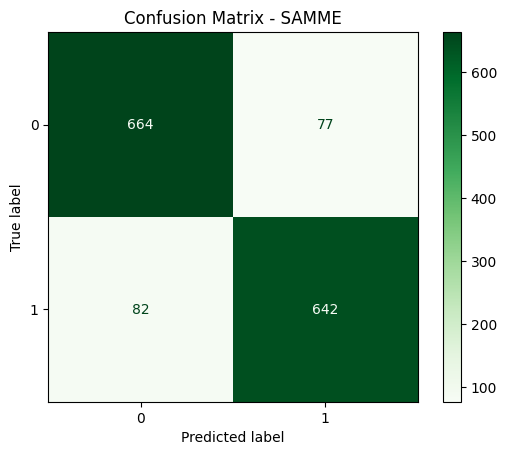

In [25]:
boosting_model = SimpleMultiClassBoosting(n_estimators = 50)
boosting_model.fit(X_train, y_train)
y_pred = boosting_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - SAMME")
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       741
           1       0.91      0.93      0.92       724

    accuracy                           0.92      1465
   macro avg       0.92      0.92      0.92      1465
weighted avg       0.92      0.92      0.92      1465

Accuracy: 0.92


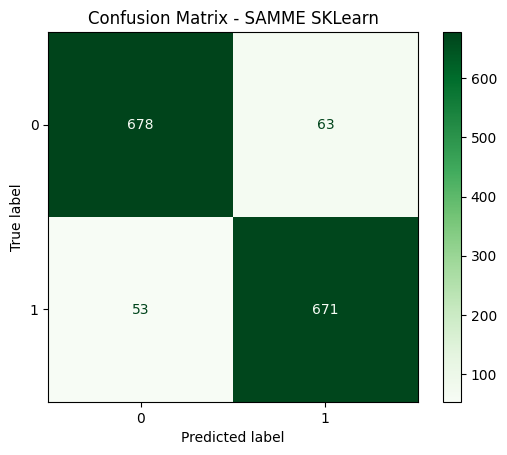

In [26]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - SAMME SKLearn")
plt.show()